In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.colors import LogNorm
import math as mth
import timeit
import Boundary_Functions as bf

from mpmath import *
from pynverse import inversefunc
from scipy.special import gamma as gamma
from scipy.special import gammaincc as gamma3
from mpmath import gammainc as gamma2

#import warnings
#warnings.filterwarnings("ignore")


In [2]:
M0=1.0
Q=0.95
ru0=5.0
dr0v=0.4

N=40
umax=11
vmax=50
du0=M0/N
dv0=du0

Nu=int(N*umax)
Nv=int(N*vmax)

rplus=M0+(M0**2-Q**2)**(0.5)
rminus=M0-(M0**2-Q**2)**(0.5)

In [3]:
print(bf.rbounrninv(5.1,M0,Q,ru0,dr0v*bf.esigrn(M0,Q,ru0)))
print(bf.esigrn(M0,Q,ru0))
print(bf.dr2rn(M0,Q,dr0v,ru0))

0.1376515120410069
1.8592264486151873
-0.3975625


1.8592264486151873
[ 5.          4.99006094  4.98012188  4.97018281  4.96024375  4.95030469
  4.94036563  4.93042656  4.9204875   4.91054844  4.90060938  4.89067031
  4.88073125  4.87079219  4.86085313  4.85091406  4.840975    4.83103594
  4.82109688  4.81115781  4.80121875  4.79127969  4.78134063  4.77140156
  4.7614625   4.75152344  4.74158438  4.73164531  4.72170625  4.71176719
  4.70182813  4.69188906  4.68195     4.67201094  4.66207187  4.65213281
  4.64219375  4.63225469  4.62231562  4.61237656  4.6024375   4.59249844
  4.58255937  4.57262031  4.56268125  4.55274219  4.54280312  4.53286406
  4.522925    4.51298594  4.50304687  4.49310781  4.48316875  4.47322969
  4.46329062  4.45335156  4.4434125   4.43347344  4.42353438  4.41359531
  4.40365625  4.39371719  4.38377813  4.37383906  4.3639      4.35396094
  4.34402188  4.33408281  4.32414375  4.31420469  4.30426563  4.29432656
  4.2843875   4.27444844  4.26450938  4.25457031  4.24463125  4.23469219
  4.22475313  4.21481406  4.2048

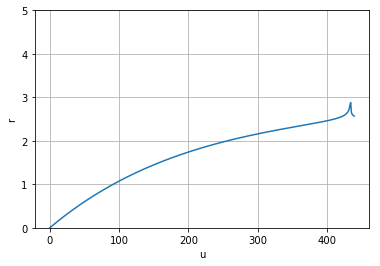

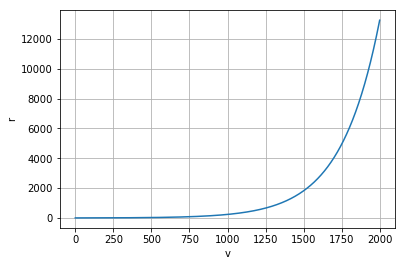

[ 0.          0.01341529  0.02676843  0.0400597   0.05328936  0.06645769
  0.07956496  0.09261144  0.10559739  0.11852308  0.13138877  0.14419473
  0.15694123  0.16962851  0.18225686  0.19482651  0.20733774  0.21979079
  0.23218594  0.24452342  0.2568035   0.26902643  0.28119246  0.29330185
  0.30535483  0.31735167  0.32929261  0.3411779   0.35300777  0.36478249
  0.37650229  0.38816742  0.39977811  0.41133461  0.42283716  0.434286
  0.44568136  0.45702348  0.46831261  0.47954897  0.49073279  0.50186432
  0.51294378  0.52397141  0.53494743  0.54587208  0.55674558  0.56756816
  0.57834005  0.58906147  0.59973265  0.61035381  0.62092518  0.63144697
  0.64191941  0.65234272  0.66271712  0.67304282  0.68332004  0.693549
  0.70372992  0.71386301  0.72394848  0.73398655  0.74397743  0.75392133
  0.76381846  0.77366903  0.78347325  0.79323133  0.80294347  0.81260989
  0.82223078  0.83180634  0.8413368   0.85082234  0.86026317  0.86965949
  0.8790115   0.8883194   0.89758339  0.90680366  0.915

In [4]:
rlistu=ru0+bf.dr2rn(M0,Q,dr0v,ru0)*np.arange(0,umax,du0)
rlistv=ru0+dr0v*np.arange(0,vmax,dv0)

print(bf.esigrn(M0,Q,ru0))
print(rlistu)

ulist=np.empty((Nu))
vlist=np.empty((Nv))

for i in range(0,Nu):
    ulist[i]=bf.rbounrninv(float(rlistu[i]),M0,Q,ru0,bf.dr2rn(M0,Q,dr0v,ru0)*(bf.esigrn(M0,Q,rlistv[0]))**(1))

for j in range(0,Nv):
    vlist[j]=bf.rbounrninv(float(rlistv[j]),M0,Q,ru0,dr0v*(bf.esigrn(M0,Q,rlistv[0]))**(1))

plt.plot(ulist)#,rlistu)
plt.xlabel('u')
plt.ylabel('r')
#plt.xlim(0,1)
plt.ylim(0,5)
plt.grid()
plt.show()    
    
plt.plot(vlist)#,rlistv)
plt.xlabel('v')
plt.ylabel('r')
#plt.xlim(0,1)
#plt.ylim(4,5)
plt.grid()
plt.show()

print(ulist)

In [5]:
bf.rbounrninv(ru0,M0,Q,ru0,bf.dr2rn(M0,Q,dr0v,ru0)*(bf.esigrn(M0,Q,rlistv[0]))**(0))

0.0

#ulist=np.arange(0,10,.1)

rlist=np.zeros((Nu,Nv))*np.nan

#rbounrnu= inversefunc(bf.rbounrninv,args=(M0,Q,ru0,bf.drrn(M0,Q,dr0v,ru0)),domain=[0,6],open_domain=[False,False],image=[0,100])
#rbounrnv= inversefunc(bf.rbounrninv,args=(M0,Q,ru0,dr0v),domain=[0,20],open_domain=[False,False],image=[0,1000])

for i in range(0,Nu):
    
    rlist[i][0]=bf.rrn(M0,Q,ru0,dr0v,ulist,vlist,i)
    print(rlist[i][0])
    
for j in range(0,Nv):
    
    rlist[0][j]=bf.rrn(M0,Q,ru0,dr0v,ulist,vlist,0)

plt.plot(ulist,rlist[:,0])
plt.show()

In [6]:
rlist=np.zeros((Nu,Nv))*np.nan

for i in range(0,Nu):
    #for j in range(0,Nv):
    rlist[i]=bf.rrn(M0,Q,ru0,dr0v,ulist,vlist,i).reshape(Nv)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:218: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\Brandon Piotrzkowski\OneDrive\Research\Summer 2017 Research\py codes\notebooks\Boundary_Functions.py:139: RuntimeWarning: invalid value encountered in power
  return 1/r**2*dr0*mth.exp(2*kplus*(ru0-r))*(r-rminus)**(1+kplus/kminus)*(ru0-rminus)**(-1-kplus/kminus)*ru0**2
C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:218: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


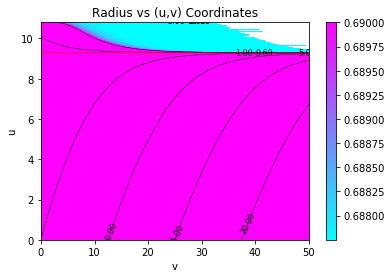

In [65]:
levels=[.683,.685,.69,1.0,5.0,10.0,15.0,20.0,25.0,30.0]

plot1=plt.imshow(rlist,cmap=plt.cm.cool,extent=(0,vmax,0,umax),aspect='auto',origin='lower',vmax=.69)
plot4=plt.contour(rlist, levels,linewidths=0.5,colors='black',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
plot5=plt.contour(rlist, [rminus],linewidths=0.6,colors='blue',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
plot6=plt.contour(rlist, [rplus],linewidths=0.6,colors='red',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
plt.clabel(plot4, levels,  
           inline=0, inline_spacing=0, 
           fmt='%1.2f',rightside_up=True,
           fontsize=8)
#sample3=plt.plot(vrange[-1],drdvnplist)
#sample3=plt.plot(vrange,dsigdvnplist)
plt.xlabel('v')
plt.ylabel('u')
plt.xlim()
plt.ylim(0,10.8)
plt.colorbar(plot1)
plt.title('Radius vs (u,v) Coordinates')
#plt.savefig('Test1-2.png',dpi=300)
plt.show()

In [8]:
urange0=np.zeros((Nu))
vrange0=np.zeros((Nv))

dt=du0
for i in range(0,Nu-1):
    #r=rlist[i][0]
    #esig=32*M0**(3.0)/r*mth.exp(-r/(2*M0))
    try:
        urange0[i+1]=urange0[i]+dt
    except OverflowError:
        urange0[i+1]=np.nan
for j in range(0,Nv-1):
    #r=rlist[0][j]
    #esig=32*M0**3/r*mth.exp(-r/(2*M0))
    try:
        vrange0[j+1]=vrange0[j]+dt
    except OverflowError:
        vrange0[j+1]=np.nan
    
    
print(urange0)

[  0.      0.025   0.05    0.075   0.1     0.125   0.15    0.175   0.2
   0.225   0.25    0.275   0.3     0.325   0.35    0.375   0.4     0.425
   0.45    0.475   0.5     0.525   0.55    0.575   0.6     0.625   0.65
   0.675   0.7     0.725   0.75    0.775   0.8     0.825   0.85    0.875
   0.9     0.925   0.95    0.975   1.      1.025   1.05    1.075   1.1
   1.125   1.15    1.175   1.2     1.225   1.25    1.275   1.3     1.325
   1.35    1.375   1.4     1.425   1.45    1.475   1.5     1.525   1.55
   1.575   1.6     1.625   1.65    1.675   1.7     1.725   1.75    1.775
   1.8     1.825   1.85    1.875   1.9     1.925   1.95    1.975   2.
   2.025   2.05    2.075   2.1     2.125   2.15    2.175   2.2     2.225
   2.25    2.275   2.3     2.325   2.35    2.375   2.4     2.425   2.45
   2.475   2.5     2.525   2.55    2.575   2.6     2.625   2.65    2.675
   2.7     2.725   2.75    2.775   2.8     2.825   2.85    2.875   2.9
   2.925   2.95    2.975   3.      3.025   3.05    3.075   3.1 

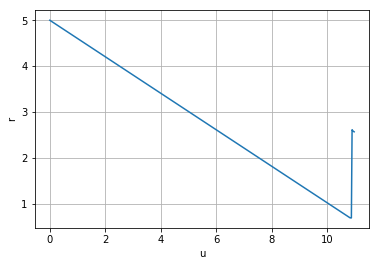

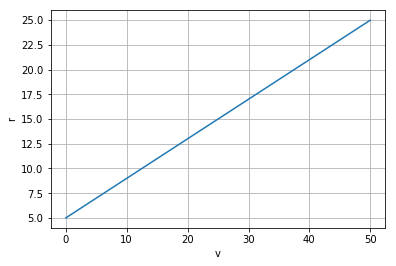

In [9]:
plt.plot(urange0,rlist[:,0])
plt.xlabel('u')
plt.ylabel('r')

plt.grid()
plt.show()

plt.plot(vrange0,rlist[0,:])
plt.xlabel('v')
plt.ylabel('r')
plt.grid()
plt.show()

In [10]:
#for i in range(0,Nu):
    #print(rlist[i,0])
    
#for j in range(0,Nv):
    #print(rlist[0,j])

In [11]:
print(rlist[:,:])

[[  5.           5.01000003   5.02000002 ...,  24.97000054  24.98000054
   24.99000054]
 [  4.99006091   5.00005069   5.01004048 ...,  24.95559734  24.96559686
   24.97559637]
 [  4.98012186   4.99010137   5.00008091 ...,  24.94118008  24.95117911
   24.96117814]
 ..., 
 [  2.59294816   2.59865916   2.60438165 ...,  20.67081495  20.68064143
   20.69046806]
 [  2.57916734   2.58483619   2.59051658 ...,  20.63631115  20.64613595
   20.65596091]
 [  2.56943872   2.57507761   2.58072807 ...,  20.61180105  20.62162466
   20.63144842]]


In [12]:


#print(rlist[:,0])
print((rlist[1,0]-rlist[0,0])/(urange0[1]-urange0[0]))
der1=(rlist[11,0]-rlist[10,0])/(urange0[11]-urange0[10])
print(der1)

#print(rlist[0,:])
print((rlist[0,1]-rlist[0,0])/(vrange0[1]-vrange0[0]))
der2=(rlist[0,11]-rlist[0,10])/(vrange0[11]-vrange0[10])
print(der2)

-0.397563781061
-0.397562917318
0.400001262293
0.39999993098


In [13]:
s=-.10
x=7.5


#print(gamma2(s,0,x))
print(gamma(s)*(gamma3(s,x)))
print(((s-1)*gamma3(s-1,x)*gamma(s-1)-x**(s-1)*mth.exp(-x)))
print((gamma3(s+1,x)*gamma(s+1)-(x)**(s)*mth.exp(-x))/s)

nan
nan
5.32404526451e-05


In [14]:
print(bf.drrn(M0,Q,bf.drrn(M0,Q,dr0v,100),100))

0.4


In [15]:
print(bf.rbounrninv(float(rlist[0][0]),M0,Q,ru0,dr0v))

0.0


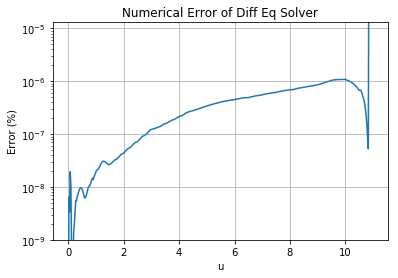

In [16]:
#plt.plot(ulist2,abs(ulist-ulist2)/ulist)
plt.plot(urange0,abs(rlist[:,0]-rlistu)/rlistu)
plt.ylim(10**(-9),1.3*10**(-5))
#plt.xlim(0,N*11)
plt.title('Numerical Error of Diff Eq Solver')
plt.yscale('log')
plt.ylabel('Error (%)')
plt.xlabel('u')
plt.grid()
plt.savefig('Diffeq-error.png',dpi=300)
plt.show()
#print(ulist-ulist2)

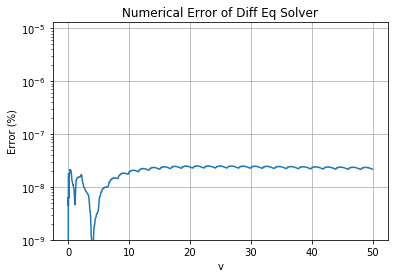

In [17]:
#plt.plot(ulist2,abs(ulist-ulist2)/ulist)
plt.plot(vrange0,abs(rlist[0,:]-rlistv)/rlistv)
plt.ylim(10**(-9),1.3*10**(-5))
#plt.xlim(0,N*11)
plt.title('Numerical Error of Diff Eq Solver')
plt.yscale('log')
plt.ylabel('Error (%)')
plt.xlabel('v')
plt.grid()
#plt.savefig('Test1-2.png',dpi=300)
plt.show()
#print(rlist-ulist2)

In [18]:
print(rlist)

[[  5.           5.01000003   5.02000002 ...,  24.97000054  24.98000054
   24.99000054]
 [  4.99006091   5.00005069   5.01004048 ...,  24.95559734  24.96559686
   24.97559637]
 [  4.98012186   4.99010137   5.00008091 ...,  24.94118008  24.95117911
   24.96117814]
 ..., 
 [  2.59294816   2.59865916   2.60438165 ...,  20.67081495  20.68064143
   20.69046806]
 [  2.57916734   2.58483619   2.59051658 ...,  20.63631115  20.64613595
   20.65596091]
 [  2.56943872   2.57507761   2.58072807 ...,  20.61180105  20.62162466
   20.63144842]]


In [52]:
scal=2
uplac=int(9/11*Nu+5)


rlistv3=ru0+dr0v*np.arange(0,vmax*scal,dv0/scal)
vlist2=np.empty((Nv*scal))

for j in range(0,Nv*scal):
    vlist2[j]=bf.rbounrninv(float(rlistv3[j]),M0,Q,ru0,dr0v*(bf.esigrn(M0,Q,rlistv[0]))**(1))

rlistv3=bf.rrn(M0,Q,ru0,dr0v,ulist,vlist2,uplac).reshape(Nv*scal)




C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:218: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


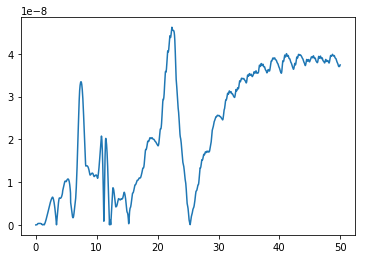

[-0.30811086 -0.30975305 -0.31140097 ...,         nan         nan
         nan]


In [53]:
rlistv3f=rlistv3[::scal]


plt.plot(vrange0,abs(rlist[uplac,:]-rlistv3f)/rlistv3f)
plt.show()



print(rlist[int(9/10*Nu),:]-rlistv3f)
#print(rlistv3f[:7000])

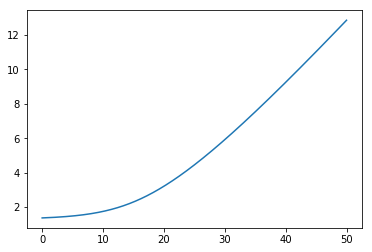

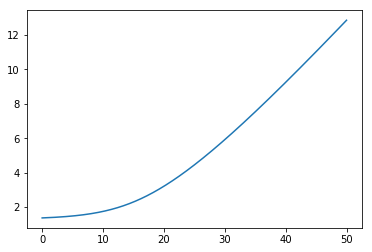

In [54]:
plt.plot(vrange0,rlist[uplac,:])
plt.show()

plt.plot(vrange0,rlistv3f)
plt.show()

In [48]:
#for j in range(0,Nv):
    #print(rlistv3[2*j]-rlistv3f[j])
    